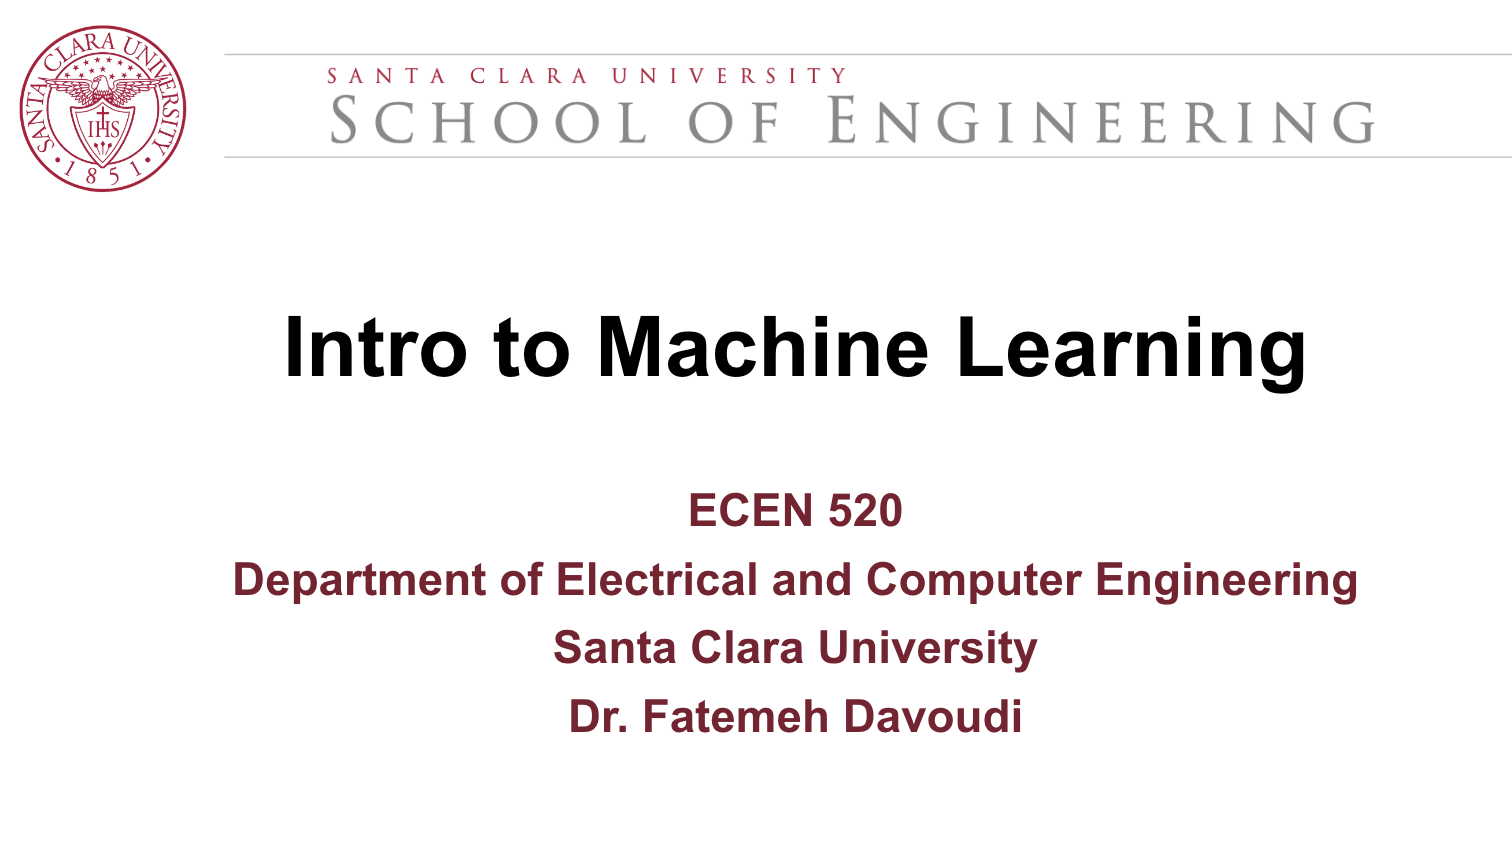

# Linear Regression

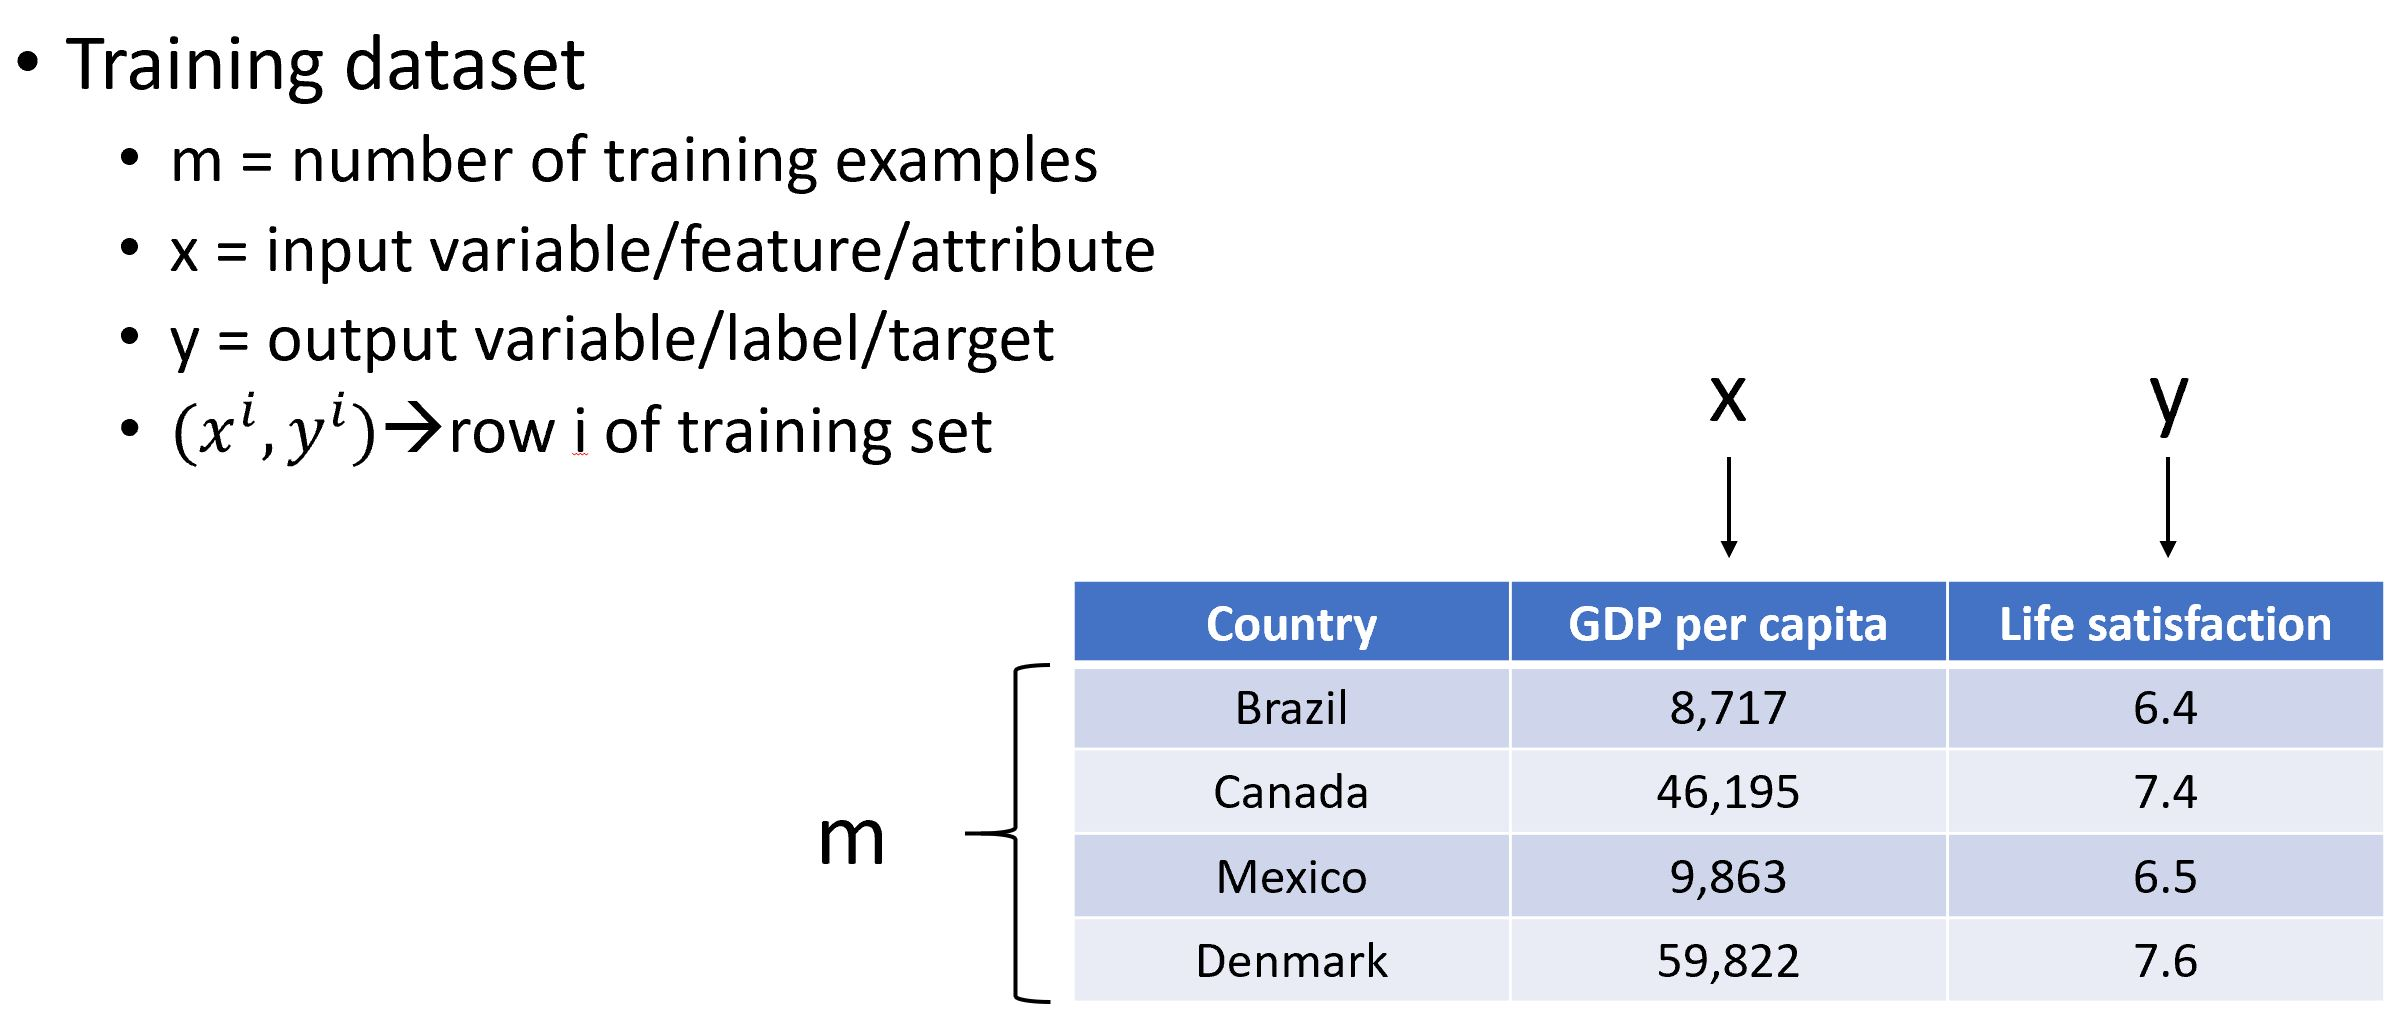

# Housing Dataset - Look at the Big Picture

Welcome to the Machine Learning Housing Corporation! Your first task is to use California census data to build a model of housing prices in the state. This data includes metrics such as the population, median income, and median housing price for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). I will call them “districts” for short.

Your model should learn from this data and be able to predict the median housing price in any district, given all the other metrics.

**Frame the Problem**

The first question to ask  is what exactly the business objective is. Building a model is probably not the end goal. How does the company expect to use and benefit from this model? Knowing the objective is important because it will determine how you frame the problem, which algorithms you will select, which performance measure you will use to evaluate your model, and how much effort you will spend tweaking it.

The answer is that your model’s output (a prediction of a district’s median housing price) will be fed to another machine learning system (see the following figure), along with many other signals. This downstream system will determine whether it is worth investing in a given area. Getting this right is critical, as it directly affects revenue.

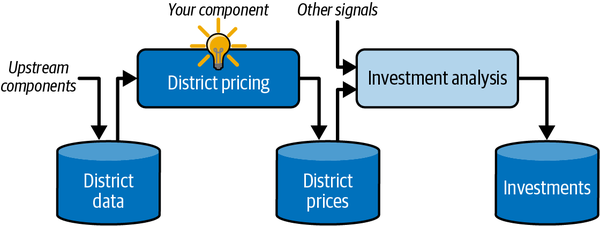

The next question to ask is what the current solution looks like (if any). The current situation will often give you a reference for performance, as well as insights on how to solve the problem. Your boss answers that the district housing prices are currently estimated manually by experts: a team gathers up-to-date information about a district, and when they cannot get the median housing price, they estimate it using complex rules.

This is costly and time-consuming, and their estimates are not great; in cases where they manage to find out the actual median housing price, they often realize that their estimates were off by more than 30%. This is why the company thinks that it would be useful to train a model to predict a district’s median housing price, given other data about that district. The census data looks like a great dataset to exploit for this purpose, since it includes the median housing prices of thousands of districts, as well as other data.

With all this information, you are now ready to start designing your system. First, determine what kind of training supervision the model will need: is it a supervised, unsupervised, semi-supervised, self-supervised, or reinforcement learning task? And is it a classification task, a regression task, or something else? Should you use batch learning or online learning techniques? Before you read on, pause and try to answer these questions for yourself.

Have you found the answers? Let’s see. This is clearly a typical supervised learning task, since the model can be trained with labeled examples (each instance comes with the expected output, i.e., the district’s median housing price). It is a typical regression task, since the model will be asked to predict a value. More specifically, this is a multiple regression problem, since the system will use multiple features to make a prediction (the district’s population, the median income, etc.). It is also a univariate regression problem, since we are only trying to predict a single value for each district. If we were trying to predict multiple values per district, it would be a multivariate regression problem. Finally, there is no continuous flow of data coming into the system, there is no particular need to adjust to changing data rapidly, and the data is small enough to fit in memory, so plain batch learning should do just fine.

**Select a Performance Measure**

Your next step is to select a performance measure. A typical performance measure for regression problems is the root mean square error (RMSE). It gives an idea of how much error the system typically makes in its predictions, with a higher weight given to large errors. Following equation shows the mathematical formula to compute the RMSE. <br>
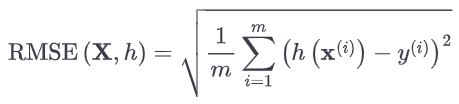




This equation introduces several very common machine learning notations:


*   m is the number of instances in the dataset you are measuring the RMSE on. For example, if you are evaluating the RMSE on a validation set of 2,000 districts, then m = 2,000.
*   x(i) is a vector of all the feature values (excluding the label) of the ith instance in the dataset, and y(i) is its label (the desired output value for that instance). For example, if the first district in the dataset is located at longitude –118.29°, latitude 33.91°, and it has 1,416 inhabitants with a median income of \$38,372, and the median house value is $156,400 (ignoring other features for now), then: <br>
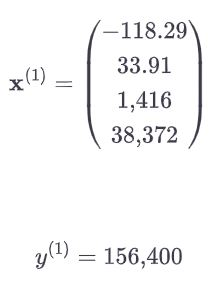

*   X is a matrix containing all the feature values (excluding labels) of all instances in the dataset. There is one row per instance, and the ith row is equal to the transpose of x(i), noted (x(i))⊺. For example, if the first district is as just described, then the matrix X looks like this: <br>
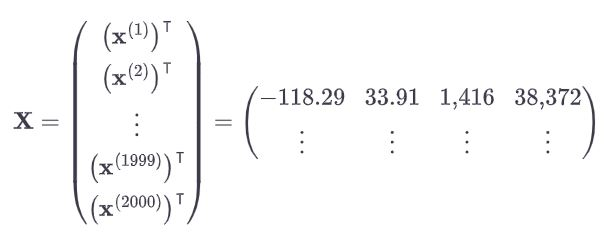
*   h is your system’s prediction function, also called a hypothesis. When your system is given an instance’s feature vector x(i), it outputs a predicted value ŷ(i) = h(x(i)) for that instance (ŷ is pronounced “y-hat”). For example, if your system predicts that the median housing price in the first district is $158,400, then ŷ(1) = h(x(1)) = 158,400. The prediction error for this district is ŷ(1) – y(1) = 2,000.


*   RMSE(X,h) is the cost function measured on the set of examples using your hypothesis h.








**Data Preparation**

In [ ]:
# import the dataset using pandas
import pandas as pd
housing = pd.read_csv('housing.csv')

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=10)

In [ ]:
housing = train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = train_set["median_house_value"].copy()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler #z method; normalization (xi- mu)/sd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

cat_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("oneHot", OneHotEncoder()),
])

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [ ]:
from sklearn.linear_model import LinearRegression

housing_prepared = preprocessing.fit_transform(housing)
lin_reg = LinearRegression()

lin_reg.fit(housing_prepared, housing_labels)


LinearRegression()

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHot',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('linearregression', LinearRegression())])

In [ ]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)  # -2 = rounded to the nearest hundred

array([183600., 218100., 314300., 157900., 234400.])

In [ ]:
housing_labels.iloc[:5].values

array([145200, 117000, 263900, 163700, 236100])

Well, it works, but not always: the first prediction is way off (by over $200,000!), while the other predictions are better: two are off by about 25%, and two are off by less than 10%. Remember that you chose to use the RMSE as your performance measure, so you want to measure this regression model’s RMSE on the whole training set using Scikit-Learn’s mean_squared_error() function, with the squared argument set to False:

In [ ]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(housing_labels, housing_predictions)**0.
lin_rmse

4697655405.936046

This is better than nothing, but clearly not a great score: the median_housing_values of most districts range between 120,000 dollars and 265,000 dollars, so a typical prediction error of $66,658 is really not very satisfying. This is an example of a model underfitting the training data. When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough. **The main ways to fix underfitting are to select a more powerful model**, to feed the training algorithm with better features, or to reduce the constraints on the model.

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate MSE first
lin_mse = mean_squared_error(housing_labels, housing_predictions)

# Then take the square root to get RMSE
lin_rmse = lin_mse**0.5
lin_rmse

68539.44416127144